# Lab 6:  Implement your own version of K-means

In class we have discussed how the K-means algorithm works, and you can read more about it in the text.  Your task this week is to implement your own version of K-means, and use it to cluster faces in the Olivetti dataset.  

You can work on this task either by yourself, or with one or two partners.  Please do *not* have a groupsize larger than 3, however.  Submission instructions are on Canvas.


# Part I:  Implement K-means

Your task is to implement a function called `get_clusters` that takes in a set of data and a number of clusters, and returns the centroids of those clusters, as well as the closest centroid for each data point.  Your code should make use of reasonable subfunctions, use good choices of variables, and be commented as necessary.

In [ ]:
import numpy as np

In [ ]:
import random
import math

def calc_distance(p1: np.ndarray, p2: np.ndarray) -> float:
    # Apply distance equation
    return np.sqrt(np.sum((p1 - p2) ** 2))

def init_centroids(data: np.ndarray, n_clusters: int) -> np.ndarray:
    # Python list of chosen centroids, stored as ndarray
    centroids = []
    # List of indeces of chosen centroids in data array
    used_centroids = []

    # Select n_clusters number of points from data to serve as centroids
    for i in range(n_clusters):
        centroid_found = False
        while not centroid_found:
            # Random index of point in data possibly to be used as centroid
            rand_index = random.randint(0, data.shape[0] - 1)

            # If point at index has not already been chosen as centroid
            # Note: we were unable to use in syntax directly with ndarray points
            if rand_index not in used_centroids:
                # Append centroid index to used_centroids list
                used_centroids.append(rand_index)
                rand_pt = data[rand_index]
                # Add ndarray point of centroid to centroids list
                centroids.append(rand_pt)
                centroid_found = True

    # Convert centroids list to ndarray
    return np.array(centroids)

def assign_to_clusters(data: np.ndarray, centroids: np.ndarray) -> dict:
    clusters = dict()

    for p in data:
        # Set min distance to arbitrarily large value
        min_dist = 100000
        # Index of centroid in centroids array
        closest_centroid = -1
        # Check to find closest centroid, adding to centroid index's
        # associated value in clusters dict if proven smallest distance
        for c in range(centroids.shape[0]):
            dist = calc_distance(p, centroids[c])

            if dist < min_dist:
                min_dist = dist
                closest_centroid = c

        if closest_centroid in clusters:
            clusters[closest_centroid].append(p)
        else:
            clusters[closest_centroid] = [p]

    return clusters

def update_centroids(data: np.ndarray, centroids: np.ndarray,
                     clusters: np.ndarray) -> np.ndarray:
    new_centroids = list()

    for centroid_i in clusters:
        new_centroids.append(np.mean(clusters[centroid_i], axis=0))

    return np.array(new_centroids)

def test():
    data = np.array([[23, 12],
[45, 67],
[11, 89],
[34, 56],
[78, 90],
[12, 34],
[56, 78],
[91, 23],
[44, 55],
[32, 21],
[67, 45],
[76, 54],
[89, 12],
[98, 76],
[53, 31],
[22, 88],
[47, 29],
[13, 57],
[39, 72],
[61, 83],
[49, 26],
[14, 93],
[36, 52],
[75, 81],
[90, 14],
[63, 27],
[19, 64],
[42, 79],
[58, 30],
[95, 10],
[20, 46],
[87, 32],
[69, 25],
[99, 37],
[54, 13],
[26, 77],
[68, 41],
[85, 62],
[92, 33],
[17, 71],
[59, 11],
[48, 28],
[31, 74],
[40, 82],
[66, 20],
[73, 55],
[80, 92],
[15, 97],
[35, 44],
[50, 86],
[77, 60],
[88, 24],
[29, 19],
[62, 38],
[79, 51],
[94, 67],
[57, 16],
[84, 43],
[100, 36],
[72, 47],
[21, 85],
[11, 53],
[90, 75],
[64, 31],
[42, 95],
[70, 23],
[37, 14],
[58, 63],
[26, 97],
[19, 82],
[49, 60],
[15, 78],
[55, 99],
[81, 39],
[30, 91],
[68, 27],
[93, 88],
[34, 59],
[47, 72],
[18, 67],
[76, 44],
[86, 12],
[96, 52],
[25, 61],
[32, 74],
[45, 17],
[51, 100],
[82, 38],
[69, 40],
[13, 89],
[91, 28],
[48, 57],
[36, 98],
[79, 64],
[53, 95],
[22, 46],
[92, 83],
[41, 10],
[33, 20],
[75, 55]])
    nclusters = 10

    get_clusters(data, nclusters)

def index_of(data: np.ndarray, pt: np.ndarray) -> int:
    for i in range(data.size):
        if np.array_equal(data[i], pt):
            return i

def kmeans_recursive(data: np.ndarray, centroids: np.ndarray,
                     clusters: dict, iter: int) -> tuple[np.ndarray, dict]:
    # Recalculate centroids
    new_centroids = update_centroids(data, centroids, clusters)

    # Compare new centroids with old centroids, base case
    diffs = []
    for i in range(new_centroids.shape[0]):
        diffs.append(calc_distance(new_centroids[i], centroids[i]))
    if (sum(diffs) < 0.1) or (iter > 100):
        return new_centroids, clusters

    new_clusters = assign_to_clusters(data, new_centroids)
    return kmeans_recursive(data, new_centroids, new_clusters, iter + 1)

def get_clusters(data: np.ndarray, n_clusters: int) -> tuple[np.ndarray, np.ndarray]:
    # Fill in the details.  This function should probably consist of some kind of loop,
    # and the work within that loop should mostly be done via calls to other functions
    # that you define and that carry out small, specific tasks

    # Return the centroids and the closest centroid for each datapoint

    centroids = init_centroids(data, n_clusters)
    clusters = assign_to_clusters(data, centroids)

    centroids, clusters = kmeans_recursive(data, centroids, clusters, 0)

    closest_centroids = np.zeros((data.shape[0], 2))
    # Create closest_centroids array, each index corresponding to one in data
    for cent in clusters:
        # Points attached to cluster
        pts = clusters[cent]

        for p in pts:
            # Find corresponding index in data for each point, set centroid point
            data_i = index_of(data, p)
            closest_centroids[data_i] = centroids[cent]

    return centroids, closest_centroids

test()

# Part II:  Use your code to cluster the Olivetti dataset

Now use your clustering code to cluster the following pseudo-random data.  Examine the following questions:
* How well does your code do if you try to use 4 clusters?
* How well does it do if you use a different number of clusters?  Show how some perforamance metric changes over the number of clusters
* What happens if you modify the data to be either more or less overlapped?  (You can do this by adjusting the 'cluster_center' variable, or the covs)?

Note:  if you had any issues with the implementation in Part I, just use the default KMeans class from SKLearn for this part

In [ ]:
import pandas as pd
import seaborn as sns

### Generate psuedo random clusters

In [ ]:
# These are the "actual" centers in the x-y plane
cluster_centers = [
    (0, 0),
    (2, 0),
    (0, 1),
    (3, 2)
]
# The values change how "spread out" the data is.  Feel feel to play with them.
# The bigger the values, the more spread out the data points.  These values need to represent
# symmetric matrices
covs = [
    [[.25, 0], [0, .3]],
    [[.5, .1], [.1, .5]],
    [[.25, 0], [0, .25]],
    [[.5, 0], [0, .5]],
]
n_pts_per_cluster = 20

data = []
for ix, cluster in enumerate(cluster_centers):
    cov = covs[ix]
    samples = np.random.default_rng().multivariate_normal(mean=cluster, cov=cov, size=20)
    data += [(ix, s[0], s[1]) for s in samples]

data = pd.DataFrame(data, columns=['label', 'x', 'y'])


### Visualze the data

<Axes: xlabel='x', ylabel='y'>

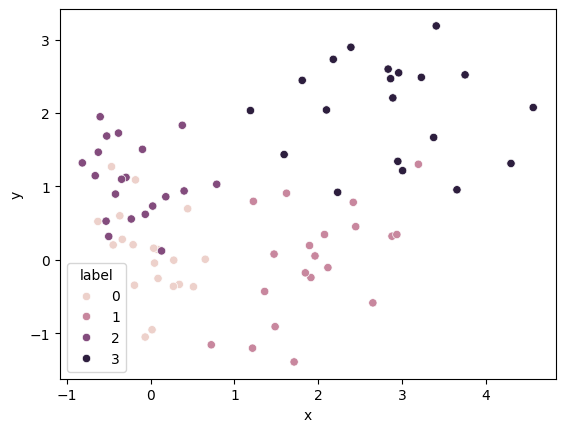

In [ ]:
sns.scatterplot(
    data=data,
    x='x',
    y='y',
    hue='label'
)

### Experiment with clustering here